In [1]:
import cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

## T1.1 Componentes conexas

(185, 272, 3)


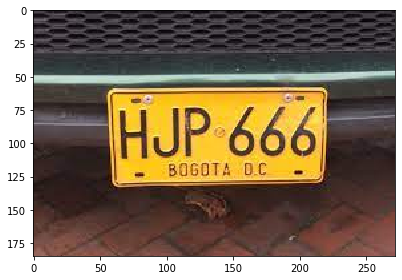

In [2]:
img = io.imread('data/labeling1/t1_1_connectedComponent.jpg')
io.imshow(img)
print(img.shape)

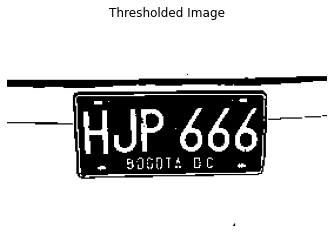

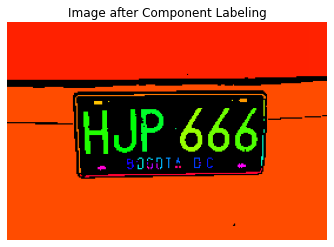

In [4]:
import cv2
import numpy as np

img = cv2.imread('data/labeling1/t1_1_connectedComponent.jpg', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
img = cv2.bitwise_not(img)
num_labels, labels = cv2.connectedComponents(img, connectivity=8)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0


# Showing Original Image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Thresholded Image")
plt.show()

#Showing Image after Component Labeling
plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Image after Component Labeling")
plt.show()